# **ENGG6500 F21**
# **YAOWEN MEI (1177855)** 

# **Assignment-1 Coding-1**
# **Implement a KNN Model with Iris Dataset**

**Tasks:** 


*  Appropriately divide the data in the file to obtain a testing set. Find the accuracy of the tested data. 
*   Select two value of K. For each value, implement the code for two distance criteria. Compare your results and provide a detailed explanation

**Reference Video**: https://www.youtube.com/watch?v=-wadcBarRRk

In [ ]:
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests as rq
import pandas as pd
from io import BytesIO

# import skr library to pre-processing the data
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# import the excel filr from github
# https://stackoverflow.com/questions/66648775/how-to-get-link-of-xlsx-file-in-github-to-be-opened-as-a-pandas-dataframe
url = "https://github.com/y5mei/ENGG6500Fall21_Machine_Learning/blob/main/Assignment-1/iris.xlsx?raw=true"
data = rq.get(url).content
df = pd.read_excel(BytesIO(data))

**STEP-1: CLEAN THE DATA**
1. Have a look at the distrubution of the dataset
2. Check if there are any NA in the dataset, if yes, assign the average value to it.
3. re-normalized the dataset on 0-1 scale and normal distribution via `preprocessing.standardscale().fit_transform()` method
**Reference**: https://www.kaggle.com/gizemaydn/learning-data-science-with-iris-and-its-outliers

In [ ]:
# df.info() # No NA in the dataset, Good
# df.describe()
# sns.pairplot(data = df, hue="variety", markers=["o","s","d"]);
X = df.iloc[:,:4]
X = preprocessing.StandardScaler().fit_transform(X) # Normalization the inputs variables [ sepal.length,sepal.width,  petal.length,  petal.width   
y = df.iloc[:,4] # seperate the output variable, variety name of the iris flower
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 19) # 20% data were used for testing, 80% data were used for training

Train the model: https://towardsdatascience.com/k-nn-on-iris-dataset-3b827f2591e

**STEP-2: MODEL TRAINING**
1. Train the model with different K values
2. Train the model with two distance function, the euclidean distance vs. the manhattan distance
3. Compare and evaluate the accuracy over different K values and different distance metrics

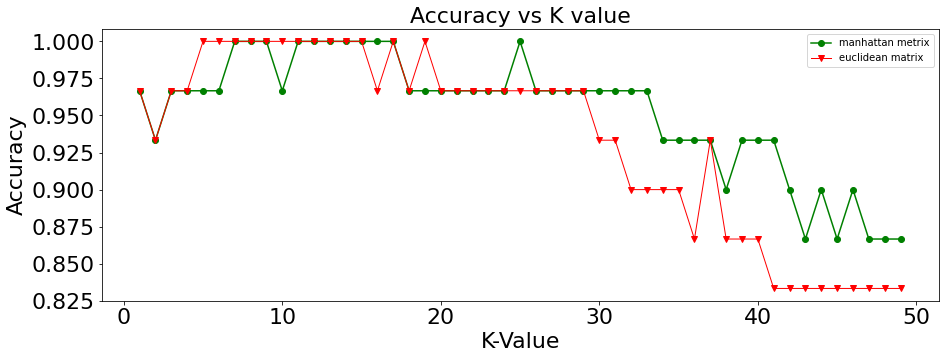

In [ ]:


def calculate_knn_accuracy_for_a_list_of_k(k: int, metrixStr: str = "euclidean") -> list:
  k_list = [_ for _ in range(1,k)]
  acc_list = []

  for k_val in k_list:
    knnmodel = KNeighborsClassifier(n_neighbors=k_val, metric=metrixStr)
    knnmodel.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knnmodel.predict(X_test))
    acc_list.append(accuracy/1.0000)
  
  return [k_list, acc_list]

import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# train the KNN model with manhattan and euclidean distance metrix
k,a = calculate_knn_accuracy_for_a_list_of_k(50, "manhattan")
m,n = calculate_knn_accuracy_for_a_list_of_k(50, "euclidean")
plt.figure(1)
l1,=plt.plot(k,a,marker = 'o', color='green', label='manhattan metrix')
l2,=plt.plot(m,n,marker = "v", color='red', linewidth=1.0, label='euclidean metrix')

plt.xlabel('K-Value', fontsize=22)
plt.ylabel('Accuracy', fontsize=22)

plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
plt.title("Accuracy vs K value", fontsize=22)
plt.legend(fontsize=10)
plt.rcParams["figure.figsize"] = (15,5) # change the size of the picture
plt.show()

**Detailed explanation**

As we can seen from the picture above, I have tested both the mahattan distance and the eculidean distance on different K values. In general, there are 3 stages:



1. At the begining, the KNN model's accuracy increase with K value incrase (from K =1 to K = 7), in this stage, the increase of K makes the model more robust to noise and outliers from the input value, so accuracy is increasing.

2. Then the accuracy remains to be 1.00, and not dependend on K values ( K = 7 to K = 17). In this stage, the model already achived the max accuracy, so within this K range, the accuracy of the model is robust to K value change.

3. Finally, with K increase, the accuray of the model decrease as K value increase (from K = 17 to K = 50). In this stage, since there are only maximum 50*0.8 = 40 samples for each category of flowers in the training dataset, as the K value approaching to 40, the accuracy of the model decrease significantly.

What's more, our input dataset has 4 degree of freedom (sepal_width, sepal_height, petal_width, petal_height). It is reported that manhattan distance (L1 norm), will works better on higher dimeniosnal dataset than the eculidean distance (L2 norm) [Reference: https://bib.dbvis.de/uploadedFiles/155.pdf] But for our Iris dataset, as we are only working with 4-Dimensional dataset, there is really no significant difference between these two distance metrixs in terms of accuracy performance. However, there are some minor differences such as:

1.   the eculidean distance performed better for very small K, (sucn as K = 5, and 6 ) than the mahattan distance
2.   the mahattan distance performed better for very big K, (such as K > 30)



# **Assignment-1 Coding-2**
# **Implement a decision tree classifier with heart.xlxs Dataset**

**Tasks:** 


*  Plot the resulting decision tree based on Gini index
*  Plot the resulting decision tree based on entropy index

**Reference Video**: https://www.youtube.com/watch?v=zvFot5vs6aQ

In [ ]:
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests as rq
import pandas as pd
from io import BytesIO
from sklearn import datasets


# import skr library to pre-processing the data
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# import the excel filr from github
# https://stackoverflow.com/questions/66648775/how-to-get-link-of-xlsx-file-in-github-to-be-opened-as-a-pandas-dataframe
heart_url = "https://github.com/y5mei/ENGG6500Fall21_Machine_Learning/blob/main/Assignment-1/heart.xlsx?raw=true"
heart_data = rq.get(heart_url).content
heart_df = pd.read_excel(BytesIO(heart_data))

STEP-1: CLEAN THE DATA


1.   Have a look at the distrubution of the dataset
2.   Check if there are any NA in the dataset (But there are actually not any)
3.   Split the dataset into training (80%) and testing (20%)


In [ ]:
# heart_df[heart_df.isnull().any(axis=1)].head() # check to make sure there is no null values in the dataset
heart_df
heartX = heart_df.iloc[:,:5]
# heartX = heartX.applymap(lambda x: "True" if x==1 else "False")
hearty = heart_df.iloc[:,5] # seperate the output variable, the target column in the heart dataset
hearty = hearty.map(lambda x: "Disease" if x==1 else "Healthy")
# split data into train and test
heartX_train, heartX_test, hearty_train, hearty_test =  train_test_split(heartX, hearty, test_size = 0.2, random_state = 19) # 20% data were used for testing, 80% data were used for training

**STEP-2 BUILD A DT WITH GINI Index**

Build the decision tree with Gini index and print the generalization error rate in the tile of the plot.

Text(0.5, 0.98, 'Decision Tree based on Gini index\n The Generalization Error Rate is 18.03%')

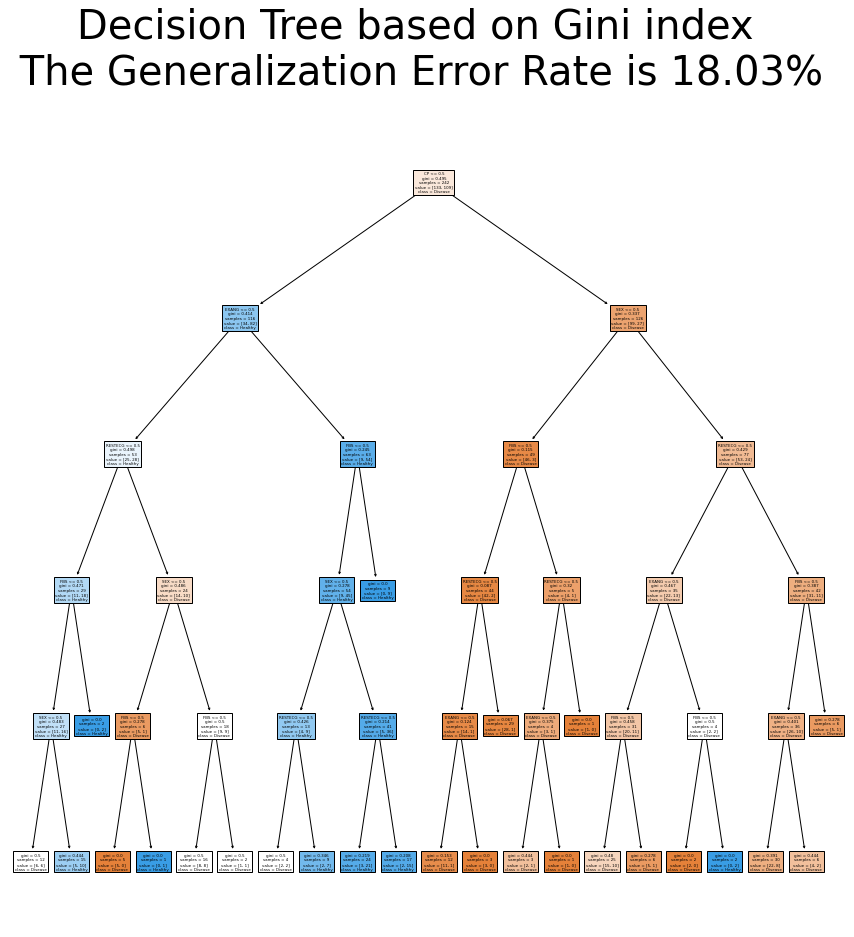

In [15]:
decisionTree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0,splitter="best")
decisionTree_classifier.fit(heartX_train, hearty_train)
decisionTree_accuracy = accuracy_score(hearty_test, decisionTree_classifier.predict(heartX_test))
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(decisionTree_classifier,feature_names=["SEX","CP","FBS","RESTECG","EXANG"],class_names=["Disease","Healthy"], filled=True)
fig.suptitle('Decision Tree based on Gini index\n The Generalization Error Rate is '+str((1-decisionTree_accuracy)*100)[:5]+"%", fontsize=40)

**STEP-3 BUILD A DT WITH Entropy Index**

Build the decision tree with entropy and print the generalization error rate in the tile of the plot.

the accuracy of this decision tree is 0.819672131147541


Text(0.5, 0.98, 'Decision Tree based on Entropy index\n The Generalization Error Rate is 18.03%')

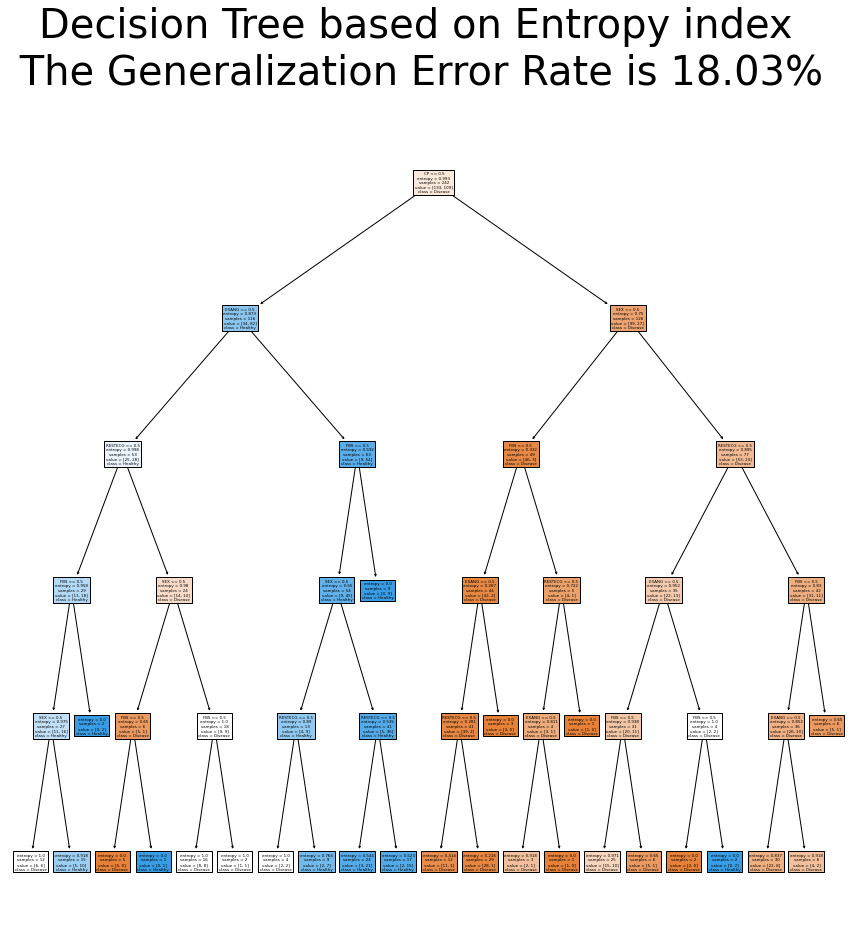

In [12]:
decisionTree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
decisionTree_classifier.fit(heartX_train, hearty_train)
decisionTree_accuracy = accuracy_score(hearty_test, decisionTree_classifier.predict(heartX_test))
print("The accuracy of this decision tree is", decisionTree_accuracy*1.000)
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(decisionTree_classifier,feature_names=["SEX","CP","FBS","RESTECG","EXANG"],class_names=["Disease","Healthy"], filled=True)
fig.suptitle('Decision Tree based on Entropy index\n The Generalization Error Rate is '+str((1-decisionTree_accuracy)*100)[:5]+"%", fontsize=40)

**Addtional Work**

Explore how the relationship between generalization error rate vs. tree depth

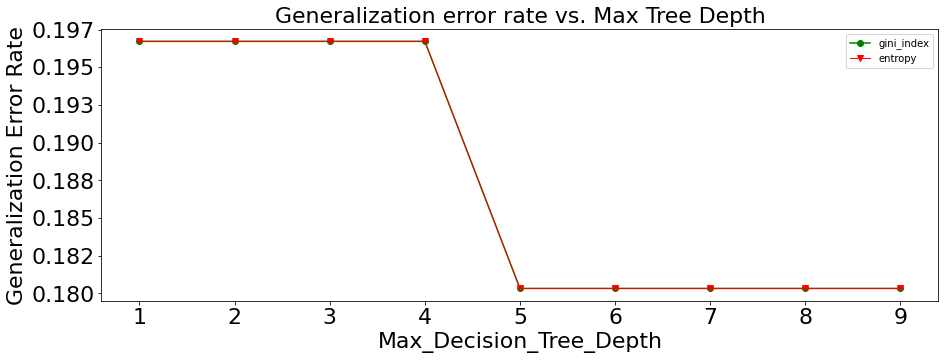

In [19]:
def calculate_dt_generalization_error_rate(depth: int, crit: str) -> []:
  # calculate the error rate of the decision tree
  # up to a given depth
  # return a tuple of [list_of_depth, list_of_error_rate]
  list_of_depth = []
  list_of_error_rate = []
  for d in range(1,depth):
    decisionTree_classifier = DecisionTreeClassifier(criterion=crit, random_state=9, max_depth=d)
    decisionTree_classifier.fit(heartX_train, hearty_train)
    decisionTree_accuracy = accuracy_score(hearty_test, decisionTree_classifier.predict(heartX_test))
    error_rate = 1-decisionTree_accuracy
    list_of_depth.append(d)
    list_of_error_rate.append(error_rate)
  
  return [list_of_depth, list_of_error_rate]

import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# train the KNN model with manhattan and euclidean distance metrix
gini_depth_list,   gini_error_rate_list = calculate_dt_generalization_error_rate(10, "gini")
entropy_depth_list, entropy_error_rate_list = calculate_dt_generalization_error_rate(10, "entropy")

plt.figure(1)
l1,=plt.plot(gini_depth_list,gini_error_rate_list,marker = 'o', color='green', label='gini_index')
l2,=plt.plot(entropy_depth_list,entropy_error_rate_list,marker = "v", color='red', linewidth=1.0, label='entropy')

plt.xlabel('Max_Decision_Tree_Depth', fontsize=22)
plt.ylabel('Generalization Error Rate', fontsize=22)

plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
plt.title("Generalization error rate vs. Max Tree Depth", fontsize=22)
plt.legend(fontsize=10)
plt.rcParams["figure.figsize"] = (15,5) # change the size of the picture
plt.show()

**Detailed explanation**

As we can seen from the picture above, I have tested both the gini index and the entropy on different tree depth.

There are several significant conclusions we can draw from the picture above:



1.   There are really no difference between the choice of gini index and entropy in terms of this heart dataset
2.   The Generalization Error Rate is 0.197 at tree depth = 1, this tells me that there is one single feature, which is the CP (see the tree plot below), that can accurately do the classification job at 80.3% accuracy. This feature can explain a lot of the heart diease problem.
3. The Accuracy of this decision tree increase a little bit (from 0.803 to 0.91) when we increase the tree depth from 4 to 5, but after this, the accuracy does not increase anymore with the depth of the tree increase. **Therefore, an interesting conclusion can be drawn here is increasing the depth of the tree can not solve all the tree accuracy problem.**



# Have a look which feature itself can provide 80.3% of the classification accuracy

Text(0.5, 0.98, 'Decision Tree based on Gini index\n The Generalization Error Rate is 19.67%')

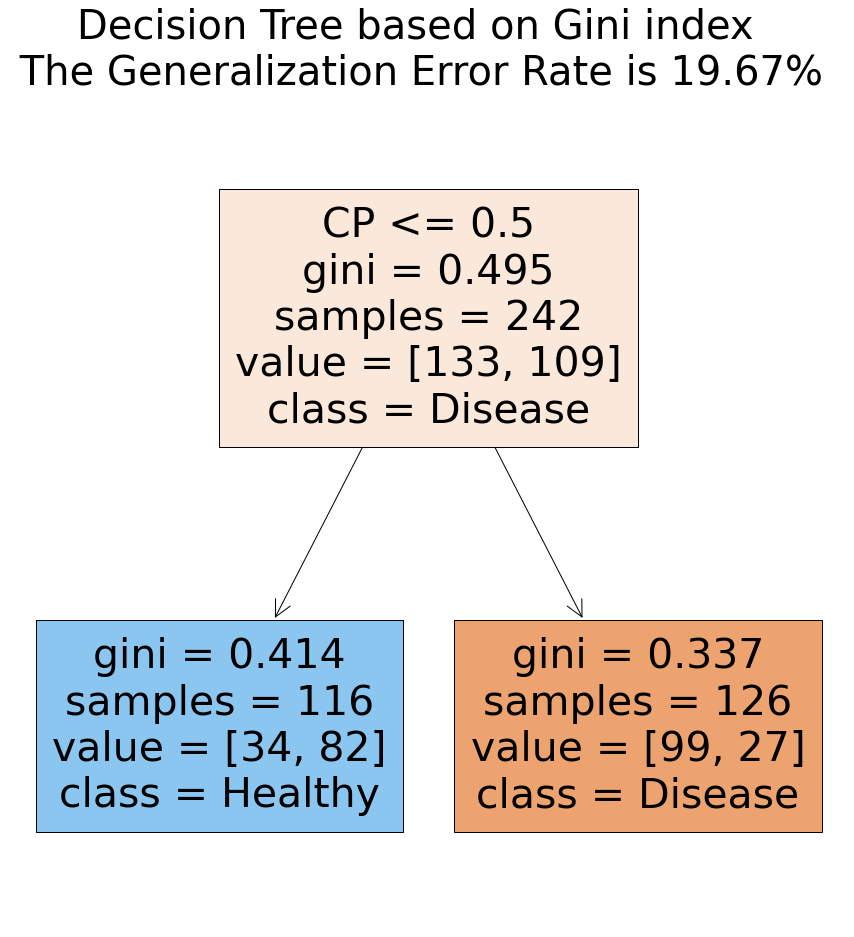

In [20]:
decisionTree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0,splitter="best",max_depth=1)
decisionTree_classifier.fit(heartX_train, hearty_train)
decisionTree_accuracy = accuracy_score(hearty_test, decisionTree_classifier.predict(heartX_test))
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(decisionTree_classifier,feature_names=["SEX","CP","FBS","RESTECG","EXANG"],class_names=["Disease","Healthy"], filled=True)
fig.suptitle('Decision Tree based on Gini index\n The Generalization Error Rate is '+str((1-decisionTree_accuracy)*100)[:5]+"%", fontsize=40)